In [1]:
# 1. Mount Drive (if you haven't already)
from google.colab import drive
drive.mount('/content/gdrive')

# 2. Define the path to your zipped dataset in Google Drive
ZIP_PATH = '/content/gdrive/MyDrive/finally.zip'

# 3. Unzip the file into the current working directory (/content/)A
# The -q flag is for quiet (less output), -d . extracts to the current directory
!unzip -q "{ZIP_PATH}" -d .

Mounted at /content/gdrive


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.0 MB/s eta 0:00:00


In [3]:
import os

# --- Configuration ---
# The path where your data.yaml file is currently located in Colab
YAML_PATH = '/content/finally/data.yaml'

# The correct absolute path to the root of your dataset in Colab
# This is the folder that contains your 'train' and 'val' folders
NEW_ROOT_PATH = '/content/finally/'

# --- Path Correction Logic ---

if not os.path.exists(YAML_PATH):
    print(f"Error: YAML file not found at {YAML_PATH}. Please check the path.")
else:
    print(f"Reading and resetting paths in {YAML_PATH} to standard YOLO structure...")

    with open(YAML_PATH, 'r') as f:
        yaml_content = f.read()

    corrected_lines = []

    # Process line by line
    for line in yaml_content.splitlines():
        line_stripped = line.strip()

        # 1. Force the main 'path:' entry to the correct Colab path
        if line_stripped.startswith('path:'):
            corrected_line = f"path: {NEW_ROOT_PATH}"
            corrected_lines.append(corrected_line)
            print(f"  Fixed 'path:' line.")

        # 2. Force 'train:', 'val:', and 'test:' to use standard RELATIVE paths
        elif line_stripped.startswith('train:'):
            corrected_lines.append("train: train/images")
            print(f"  Fixed 'train:' to 'train/images'")
        elif line_stripped.startswith('val:'):
            corrected_lines.append("val: val/images")
            print(f"  Fixed 'val:' to 'val/images'")
        elif line_stripped.startswith('test:'):
            corrected_lines.append("test: test/images")
            print(f"  Fixed 'test:' to 'test/images'")

        # 3. Keep other lines (like nc: and names:) unchanged
        else:
            corrected_lines.append(line)

    # 4. Write the corrected content back to the file
    corrected_yaml_content = '\n'.join(corrected_lines)

    with open(YAML_PATH, 'w') as f:
        f.write(corrected_yaml_content)

    print("\n✅ YAML file paths FIXED. Ready for training.")

Reading and resetting paths in /content/finally/data.yaml to standard YOLO structure...
  Fixed 'path:' line.
  Fixed 'train:' to 'train/images'
  Fixed 'val:' to 'val/images'
  Fixed 'test:' to 'test/images'

✅ YAML file paths FIXED. Ready for training.


In [ ]:
from ultralytics import YOLO

# Define the correct path to your data.yaml file
YAML_PATH = '/content/finally/data.yaml'

# Define the path to your trained model weights
MODEL_PATH = '/content/gdrive/MyDrive/best_final_push.pt'

# Load the trained model
print(f"Loading model from: {MODEL_PATH}")
model = YOLO(MODEL_PATH)

# Run validation/evaluation mode, explicitly pointing to the corrected data.yaml
print(f"\n--- Running Validation on Best Model using {YAML_PATH} ---")
metrics = model.val(data=YAML_PATH)

Loading model from: /content/gdrive/MyDrive/best_final_push.pt

--- Running Validation on Best Model using /content/finally/data.yaml ---
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3042.4±1964.4 MB/s, size: 157.6 KB)
val: Scanning /content/finally/val/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 68/68 120.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 2.6it/s 1.9s
                   all         68         69      0.917      0.974      0.958      0.865
                  good         19         19      0.862      0.989      0.947      0.878
                   bad         49         50      0.972       0.96      0.969      0.853
Speed: 5.6ms preprocess, 4.6ms inference, 0.0ms loss, 1.8ms postprocess per image
Results sav

In [ ]:
# Update this path if you have saved your weights to a different location on Drive.
# If you are starting fresh, replace the path with "yolov8n.pt" (or the model size you want).
WEIGHTS_PATH="/content/gdrive/MyDrive/YOLO_Runs/train_yolov8n_Final_Focus2/weights/best.pt"

# Define the paths based on your request
DRIVE_PROJECT_PATH = "/content/gdrive/MyDrive/YOLO_Runs"
RUN_NAME = "yolo_final_push"

full_command = f"""
yolo detect train \
model={WEIGHTS_PATH} \
data=/content/finally/data.yaml \
epochs=300 \
optimizer=AdamW \
patience=0 \
lr0=0.0001 \
lrf=0.001 \
mosaic=0.0 \
mixup=0.0 \
translate=0.0 \
# *** CRITICAL CHANGE ***: Set the base saving directory to the desired Drive folder
project={DRIVE_PROJECT_PATH} \
# Set the specific folder name for this run
name={RUN_NAME}
"""

# Execute the command using the shell operator
!{full_command}

/bin/bash: line 2: yolo: command not found


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/gdrive/MyDrive/best_final_push.pt")
model.val(data="/content/finally/data.yaml", imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


FileNotFoundError: 'data.yaml' does not exist

In [ ]:
runs/detect/val/confusion_matrix.png


NameError: name 'runs' is not defined

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
# No longer need sklearn.metrics.confusion_matrix as YOLO computes it

# Load your trained YOLOv8 model
model = YOLO("/content/gdrive/MyDrive/best_final_push.pt")  # replace with your weights path

# Validate on your test dataset (YOLOv8 automatically computes metrics)
results = model.val(data="/content/finally/data.yaml")  # your dataset yaml file

# The `model.val()` method already calculates and stores the confusion matrix.
# Access it directly from the results object.
cm = results.confusion_matrix.matrix

# Plot confusion matrix
plt.figure(figsize=(10,8))
class_names = results.names # Get class names from the results object
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('YOLOv8 Confusion Matrix')
plt.show()

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2332.9±1208.5 MB/s, size: 258.5 KB)
val: Scanning /content/finally/val/labels... 68 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 68/68 897.5it/s 0.1s
val: New cache created: /content/finally/val/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 2.0it/s 2.5s
                   all         68         69      0.917      0.974      0.958      0.865
                  good         19         19      0.862      0.989      0.947      0.878
                   bad         49         50      0.972       0.96      0.969      0.853
Speed: 4.6ms preprocess, 7.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/runs/detect/val3


AttributeError: 'DetMetrics' object has no attribute 'boxes'. See valid attributes below.
Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP).

    Attributes:
        names (dict[int, str]): A dictionary of class names.
        box (Metric): An instance of the Metric class for storing detection results.
        speed (dict[str, float]): A dictionary for storing execution times of different parts of the detection process.
        task (str): The task type, set to 'detect'.
        stats (dict[str, list]): A dictionary containing lists for true positives, confidence scores, predicted classes,
            target classes, and target images.
        nt_per_class: Number of targets per class.
        nt_per_image: Number of targets per image.

    Methods:
        update_stats: Update statistics by appending new values to existing stat collections.
        process: Process predicted results for object detection and update metrics.
        clear_stats: Clear the stored statistics.
        keys: Return a list of keys for accessing specific metrics.
        mean_results: Calculate mean of detected objects & return precision, recall, mAP50, and mAP50-95.
        class_result: Return the result of evaluating the performance of an object detection model on a specific class.
        maps: Return mean Average Precision (mAP) scores per class.
        fitness: Return the fitness of box object.
        ap_class_index: Return the average precision index per class.
        results_dict: Return dictionary of computed performance metrics and statistics.
        curves: Return a list of curves for accessing specific metrics curves.
        curves_results: Return a list of computed performance metrics and statistics.
        summary: Generate a summarized representation of per-class detection metrics as a list of dictionaries.
    

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3162.5±1751.7 MB/s, size: 143.2 KB)
val: Scanning /content/finally/val/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 68/68 135.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 2.4it/s 2.1s
                   all         68         69          0          0          0          0
                  good         19         19          0          0          0          0
                   bad         49         50          0          0          0          0
Speed: 19.4ms preprocess, 4.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /content/runs/detect/val2
[[          0           0           0]
 [          0           0           0]
 [         19          50  

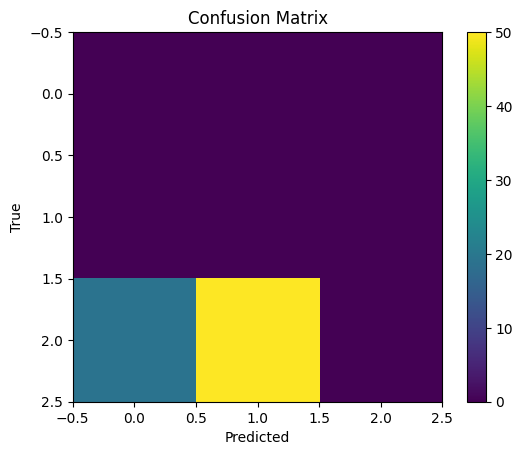

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("/content/gdrive/MyDrive/best_final_push.pt")

# Enable confusion matrix calculation
results = model.val(conf=True)

# Extract confusion matrix
cm = results.confusion_matrix.matrix  # no indexing

print(cm)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
!ls /content/finally/val/images | wc -l
!ls /content/finally/val/labels | wc -l
!ls /content/finally/train/labels | wc -l
!head /content/finally/val/labels/*.txt


68
68
549
==> /content/finally/val/labels/color_004.txt <==
0 0.708333 0.324074 0.067901 0.137860
==> /content/finally/val/labels/color_012.txt <==
1 0.768519 0.475309 0.126543 0.102881
==> /content/finally/val/labels/color_049.txt <==
1 0.706019 0.329218 0.109568 0.119342
==> /content/finally/val/labels/color_058.txt <==
0 0.841821 0.193416 0.115741 0.115226
==> /content/finally/val/labels/color_066.txt <==
0 0.847222 0.172840 0.114198 0.119342
==> /content/finally/val/labels/color_068.txt <==
1 0.820988 0.241770 0.098765 0.084362
==> /content/finally/val/labels/color_074.txt <==
1 0.782407 0.187243 0.095679 0.144033
==> /content/finally/val/labels/color_094.txt <==
1 0.856481 0.112140 0.108025 0.100823
==> /content/finally/val/labels/color_113.txt <==
1 0.862654 0.188272 0.089506 0.096708
==> /content/finally/val/labels/color_118.txt <==
1 0.861883 0.053498 0.072531 0.106996
==> /content/finally/val/labels/color_142.txt <==
1 0.664352 0.356996 0.118827 0.109053
==> /content/finally/v

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/gdrive/MyDrive/best_final_push.pt")

model.val(
    data="/content/finally/data.yaml",
    split="val",           # or 'test'
    conf=0.25,
    iou=0.6,
    save_json=True,
    save_conf=True,
)



Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3999.0±1908.4 MB/s, size: 179.4 KB)
val: Scanning /content/finally/val/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 68/68 142.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 1.7it/s 2.9s
                   all         68         69      0.921      0.974      0.962      0.877
                  good         19         19      0.862      0.989      0.947      0.882
                   bad         49         50       0.98       0.96      0.978      0.872
Speed: 4.7ms preprocess, 5.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Saving /content/runs/detect/val4/predictions.json...
Results saved to /content/runs/detect/val4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x781e4411bad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
from ultralytics import YOLO
model = YOLO("/content/gdrive/MyDrive/best_final_push.pt")
metrics = model.val()


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3534.5±1981.5 MB/s, size: 186.3 KB)
val: Scanning /content/finally/val/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 68/68 135.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 2.3it/s 2.2s
                   all         68         69      0.917      0.974      0.958      0.865
                  good         19         19      0.862      0.989      0.947      0.878
                   bad         49         50      0.972       0.96      0.969      0.853
Speed: 6.5ms preprocess, 5.1ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/runs/detect/val5


Upload an image...


Saving color_026.png to color_026.png

image 1/1 /content/color_026.png: 480x640 1 bad, 62.2ms
Speed: 3.1ms preprocess, 62.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict
Prediction completed!
Showing prediction:


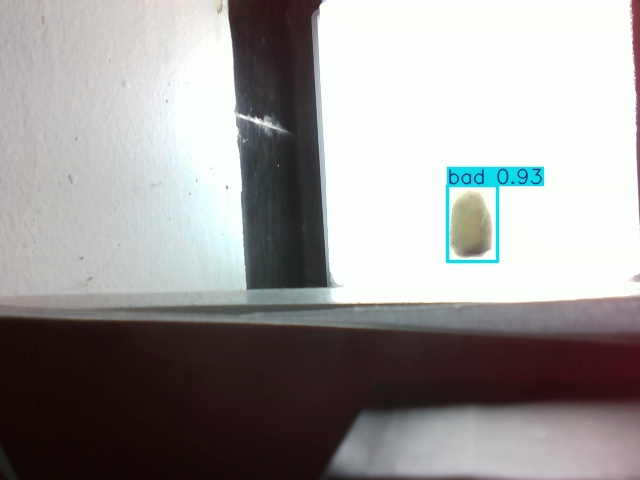


Detections:
bad  |  Confidence: 0.93


In [ ]:
# --- ONE CELL FOR FULL YOLOv8 PREDICTION WORKFLOW ---

!pip install ultralytics > /dev/null

from ultralytics import YOLO
from google.colab import files
from IPython.display import Image
import glob

# 1️⃣ Load your trained model (CHANGE PATH IF NEEDED)
model = YOLO("/content/gdrive/MyDrive/best_final_push.pt")

# 2️⃣ Upload one image
print("Upload an image...")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# 3️⃣ Run prediction (saves output automatically)
results = model.predict(source=image_path, conf=0.25, save=True)
print("Prediction completed!")

# 4️⃣ Display the predicted image
pred_path = glob.glob("/content/runs/detect/predict/*")[0]
print("Showing prediction:")
display(Image(filename=pred_path))

# 5️⃣ Print detected classes and confidence scores
print("\nDetections:")
for r in results:
    for box in r.boxes:
        cls = int(box.cls)
        score = float(box.conf)
        print(f"{model.names[cls]}  |  Confidence: {score:.2f}")
